Project: Mobile Phone Market Analysis - 2025

This dataset contains detailed specifications and official launch prices of various mobile phone models from different companies. It provides insights into smartphone hardware, pricing trends, and brand competitiveness across multiple countries. The dataset includes key features such as RAM, camera specifications, battery capacity, processor details, and screen size.

In [1]:
# Feature description

In [2]:
# Company Name: The brand or manufacturer of the mobile phone.

# Model Name: The specific model of the smartphone.

# Mobile Weight: The weight of the mobile phone (in grams).

# RAM: The amount of Random Access Memory (RAM) in the device (in GB).

# Front Camera: The resolution of the front (selfie) camera (in MP).

# Back Camera: The resolution of the primary rear camera (in MP).

# Processor: The chipset or processor used in the device.

# Battery Capacity: The battery size of the smartphone (in mAh).

# Screen Size: The display size of the smartphone (in inches).

# Launched Price: (Pakistan, India, China, USA, Dubai): The official launch price of the mobile in the respective country at the time of its release. 

# Launched Year: The year the mobile phone was officially launched.

In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [73]:
df=pd.read_csv(r"D:\Data Science\datasets\Mobiles Dataset (2025).csv",encoding='latin1')

In [74]:
df.sample(5)

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
542,Xiaomi,Redmi Note 14 Pro 4G 256GB,190g,8GB,16MP,108MP (Main) + 8MP (Ultra-wide) + 2MP (Macro),Qualcomm Snapdragon 732G,"5,000mAh",6.67 inches,"PKR 79,999","INR 27,999","CNY 2,299",USD 329.00,"AED 1,299",2024
724,Tecno,Camon 30S Pro 512GB,202g,12GB,50MP,108MP,MediaTek Dimensity 9200,"5,200mAh",6.9 inches,"PKR 159,999","INR 79,999","CNY 6,999","USD 1,099","AED 4,199",2024
276,Vivo,X21 64GB,156g,4GB,12MP,12MP,Qualcomm Snapdragon 660,3200mAh,6.28 inches,"PKR 34,999","INR 21,990","CNY 1,899",USD 299,AED 999,2018
374,Oppo,Find X5 256GB,196g,8GB,32MP,50MP + 50MP + 13MP,Snapdragon 888,4800mAh,6.55 inches,"PKR 139,999","INR 79,999","CNY 4,999",USD 799,"AED 2,999",2022
191,OnePlus,OnePlus 10 Pro 256GB,200g,12GB,32MP,50MP + 48MP,Snapdragon 8 Gen 1,5000mAh,6.7 inches,"PKR 199,999","INR 64,999","CNY 4,999",USD 899,"AED 3,299",2022


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [6]:
df.shape

(930, 15)

In [7]:
df.columns

Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Launched Year'],
      dtype='object')

In [8]:
# There are no null values.

df.isna().sum()

Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64

In [9]:
# We can see that all columns except "Launched Year" are in object data type. 
# This is not usefull as we cannot do any analysis if the values like 'Mobile Weight', 'RAM', etc.. are in string.

df.dtypes

Company Name                 object
Model Name                   object
Mobile Weight                object
RAM                          object
Front Camera                 object
Back Camera                  object
Processor                    object
Battery Capacity             object
Screen Size                  object
Launched Price (Pakistan)    object
Launched Price (India)       object
Launched Price (China)       object
Launched Price (USA)         object
Launched Price (Dubai)       object
Launched Year                 int64
dtype: object

In [10]:
# Since we need only the Indian pirce values we are dropping other price columns

df.drop(["Launched Price (Pakistan)",'Launched Price (China)', 'Launched Price (USA)','Launched Price (Dubai)'], axis=1,inplace=True)

In [11]:
# New columns

df.columns

Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (India)', 'Launched Year'],
      dtype='object')

In [12]:
# The model name column has the storage date at the end. 
df['Model Name']

0           iPhone 16 128GB
1           iPhone 16 256GB
2           iPhone 16 512GB
3      iPhone 16 Plus 128GB
4      iPhone 16 Plus 256GB
               ...         
925            Pad 5G 128GB
926            Pad 5G 256GB
927    Galaxy Z Fold6 256GB
928    Galaxy Z Fold6 512GB
929      Galaxy Z Fold6 1TB
Name: Model Name, Length: 930, dtype: object

In [13]:
# We are making a new column called "Storage (GB)" which will have the storage data from 'Model Name'

In [14]:
# We are splitting the model name by spaces
df['Model Name'][0].split(" ")

['iPhone', '16', '128GB']

In [15]:
# Now taking the last value only

df['Model Name'][0].split(" ")[-1]

'128GB'

In [16]:
# Lets apply the same to the whole column and save the values in a new column 'Storage (GB)']

df['Storage (GB)']=df['Model Name'].apply(lambda x: x.split(" ")[-1]) 
df['Storage (GB)']

0      128GB
1      256GB
2      512GB
3      128GB
4      256GB
       ...  
925    128GB
926    256GB
927    256GB
928    512GB
929      1TB
Name: Storage (GB), Length: 930, dtype: object

In [17]:
# We can see that some of the model data did not have any storage values and had strings like "Pad", "Edition", etc...

df['Storage (GB)'].unique()

array(['128GB', '256GB', '512GB', '64GB', '32GB', '1TB', '2TB', '16GB',
       'Pad', '2', 'Pro', 'P50', 'Pocket', '40E', 'X2', '9', 'P50E', '50',
       '10', 'SE', 'P60', 'Art', 'X3', '60', 'Pro+', '11', 'Ultra', '70',
       'X6', '12', 'T21', 'Xpad', '5G', 'Lite', '50i', '40S', 'Edition',
       '40', '40i', 'Flip', '30', '30S', 'X10', 'Max', '4', 'V40', 'X20',
       '5', '5T', 'Magic3', 'X30', 'X30i', '6', '6T', 'Magic4',
       'Ultimate', 'V', 'X40', 'X40i', '7', '7T', 'Magic5', 'Vs', '80',
       'X50', 'X50i', '8', '8T', 'Magic6', 'V2', '90', 'X60', 'X60i',
       '9T', 'Magic7', 'V3', 'V7', 'X8', 'V8', 'X9', '13', 'X8a', 'V9',
       '3', 'V10'], dtype=object)

In [18]:
# We are retaining only the values which have "GB" in them and then making the other values as null
# We are also stripping "GB" from the remaining values so that it can be changed to float datatype.

df['Storage (GB)']=df['Storage (GB)'].apply(lambda x : x.strip("GB") if "GB" in x else None)

In [19]:
# Now we have only values that have the storage information

df['Storage (GB)'].unique()

array(['128', '256', '512', '64', '32', None, '16'], dtype=object)

In [20]:
df['Storage (GB)']=df['Storage (GB)'].astype(float)  #changed to numeric data
df['Storage (GB)'].dtype

dtype('float64')

In [21]:
# we can see that there are some null values in "Storage" 
df.isna().sum()

Company Name                0
Model Name                  0
Mobile Weight               0
RAM                         0
Front Camera                0
Back Camera                 0
Processor                   0
Battery Capacity            0
Screen Size                 0
Launched Price (India)      0
Launched Year               0
Storage (GB)              157
dtype: int64

In [22]:
# so we are populating it with the median value.

df['Storage (GB)']=df['Storage (GB)'].fillna(df['Storage (GB)'].median())

In [23]:
# No null values now
df.isna().sum()

Company Name              0
Model Name                0
Mobile Weight             0
RAM                       0
Front Camera              0
Back Camera               0
Processor                 0
Battery Capacity          0
Screen Size               0
Launched Price (India)    0
Launched Year             0
Storage (GB)              0
dtype: int64

In [24]:
# "Mobile Weight"

df1=df.copy() # We copy into a new dataframe so that the changes we have made so far are saved.

In [25]:
df1["Mobile Weight"]

0      174g
1      174g
2      174g
3      203g
4      203g
       ... 
925    571g
926    571g
927    239g
928    239g
929    239g
Name: Mobile Weight, Length: 930, dtype: object

In [26]:
# We have to strip "g" from the values and making it a float

df1["Mobile Weight"]=df1["Mobile Weight"].apply(lambda x: x.strip("g")).astype(float)

In [27]:
# Changing the columns name to Mobile Weight (g)

df1.rename(columns={"Mobile Weight": "Mobile Weight (g)"},inplace=True)
df1.columns

Index(['Company Name', 'Model Name', 'Mobile Weight (g)', 'RAM',
       'Front Camera', 'Back Camera', 'Processor', 'Battery Capacity',
       'Screen Size', 'Launched Price (India)', 'Launched Year',
       'Storage (GB)'],
      dtype='object')

In [28]:
# To make the process easier we can try to use a loop to strip each columns with a different value and add the units correctly in the columns names.

In [29]:
# We are stripping the the columns "columns_to_strip" with the values "units_to_strip_from_columns"

columns_to_strip=['RAM', 'Front Camera', 'Back Camera','Battery Capacity', 'Screen Size', 'Launched Price (India)']
units_to_strip_from_columns=["GB",'MP','MP','mAh','inches','INR']

In [30]:
for i,j in zip(columns_to_strip,units_to_strip_from_columns):
    df1[i]=df1[i].apply(lambda x : x.strip(j).replace(",",""))     # stripping the the columns with the values and removing ","
    df1.rename(columns={i: i + " " + "(" + j + ")"},inplace=True)  # renaming columns with to include the columns names also

In [31]:
# updated column names
df1.columns

Index(['Company Name', 'Model Name', 'Mobile Weight (g)', 'RAM (GB)',
       'Front Camera (MP)', 'Back Camera (MP)', 'Processor',
       'Battery Capacity (mAh)', 'Screen Size (inches)',
       'Launched Price (India) (INR)', 'Launched Year', 'Storage (GB)'],
      dtype='object')

In [32]:
# making another copy

df2=df1.copy()

In [33]:
# Now lets check all the columns to make sure the data is clean and change to float typef

In [34]:
#  'RAM (GB)'

# There seems to be a value "8GB / 12" for two rows. 
df2['RAM (GB)'].value_counts()

RAM (GB)
8           308
6           206
12          193
4           146
3            34
16           31
2             6
1.5           2
8GB / 12      2
10            1
1             1
Name: count, dtype: int64

In [35]:
# We can replce it to reflect the higher value "12"

df2.loc[df2["RAM (GB)"]=='8GB / 12',"RAM (GB)"]= 12

In [36]:
# Now we can check again and convert to float
df2['RAM (GB)'].value_counts()

RAM (GB)
8      308
6      206
12     193
4      146
3       34
16      31
2        6
1.5      2
12       2
10       1
1        1
Name: count, dtype: int64

In [37]:
df2['RAM (GB)']=df2['RAM (GB)'].astype(float)

In [38]:
# making another copy

df3=df2.copy()

In [39]:
# We only need the highest MP value for front and back camera

df3['Front Camera (MP)'].unique()

array(['12', '12MP / 4K', '7', '10', '32', '13', '5', '16', '8',
       '12MP + 12', '2', '44', '24', '20MP+8', '20', '50', '25', '60',
       '10.7', 'Dual 32', 'Dual 60', '60MP (ultrawide) + 8MP (telephoto)',
       '60MP + 8', '11.1', '10.8', '10.5', '48', '42', '10MP 4MP (UDC)'],
      dtype=object)

In [40]:
# We are replacing all values except the higher MP values

items_to_replace=['MP / 4K','MP + 12','MP+8','Dual','MP (ultrawide)','MP (telephoto)','MP 4MP (UDC)','MP + 8',' + 8']
for i in items_to_replace:
    df3['Front Camera (MP)']=df3['Front Camera (MP)'].apply(lambda x : x.replace(i,""))
df3['Front Camera (MP)'].unique()

array(['12', '7', '10', '32', '13', '5', '16', '8', '2', '44', '24', '20',
       '50', '25', '60', '10.7', ' 32', ' 60', '11.1', '10.8', '10.5',
       '48', '42'], dtype=object)

In [41]:
df3['Front Camera (MP)']=df3['Front Camera (MP)'].astype(float)

In [42]:
# "Back Camera"
df4=df3.copy()

In [43]:
# Here also we only need the higherst MP value

df4["Back Camera (MP)"].unique()

array(['48', '50MP + 12', '48MP + 12', '12MP + 12', '12',
       '12MP + 12MP + 12', '8', '12MP + 10', '200MP + 12', '108MP + 12',
       '48MP + 8', '50MP + 5', '50MP + 2', '108MP + 8', '50MP + 8',
       '13MP + 2', '12MP + 16', '50', '16', '16MP + 5', '13', '13MP + 5',
       '16MP + 8', '13MP + 8', '13MP + 6', '5', '50MP + 48', '108',
       '64MP + 2', '48MP + 48', '48MP + 50', '48MP + 16', '48MP + 5',
       '64MP + 8', '20MP + 16', '16MP + 20', '50MP + 16', '200', '64',
       '13MP+2', '48MP + 64MP + 48', '50MP + 32MP + 48',
       '50MP + 50MP + 50', '50MP + 50', '50MP + 8MP + 2',
       '50MP + 50MP + 8', '50MP + 32MP + 8', '64MP + 8MP + 2', '8MP + 2',
       '50MP + 50MP + 64', '50MP + 50MP + 13', '50MP + 48MP + 32',
       '64MP + 32MP + 8', '50MP + 64MP + 8', '64MP + 8MP + 2MP + 2',
       '50MP + 13MP + 16MP + 2', '50MP + 16MP + 13MP + 2',
       '48MP + 8MP + 2MP + 2', '48MP + 13MP + 12',
       '48MP + 13MP + 8MP + 2', '13MP + 2MP + 2', '16MP + 2MP + 2',
       '12MP + 

In [44]:
# we are talking only the first 3 characters of each value and stripping MP

df4["Back Camera (MP)"]=df4["Back Camera (MP)"].apply(lambda x: x[0:3].strip("MP"))

In [45]:
df4["Back Camera (MP)"].unique()

array(['48', '50', '12', '8', '200', '108', '13', '16', '5', '64', '20',
       '40', '12.', '54', '160', '100'], dtype=object)

In [46]:
df4["Back Camera (MP)"]=df4["Back Camera (MP)"].astype(float)

In [47]:
# "Battery Capacity"

df5=df4.copy()
df5["Battery Capacity (mAh)"].unique()

array(['3600', '4200', '4400', '4500', '3200', '4300', '4325', '2438',
       '3240', '3095', '4352', '2227', '2815', '3687', '3110', '3046',
       '3969', '2716', '2658', '3174', '2942', '7608', '8612', '5124',
       '7812', '9720', '10307', '5000', '4800', '4000', '4700', '3900',
       '3800', '3700', '6000', '3500', '4050', '3000', '3300', '2600',
       '11200', '10090', '8400', '8000', '7040', '5100', '5050', '7600',
       '4510', '4115', '4085', '9510', '11000', '5700', '4100', '3315',
       '3260', '2300', '3055', '4030', '2000', '4450', '4600', '4830',
       '4870', '8040', '4805', '5800', '5600', '6400', '8360', '4520',
       '4350', '4025', '4040', '6500', '5500', '5200', '7100', '8340',
       '7200', '6100', '5400', '4610', '5110', '3350', '4310', '4020',
       '4360', '4460', '4815', '4750', '4900', '8200', '10100', '2800',
       '3140', '3885', '4080', '4680', '4614', '5003', '4410', '4355',
       '4385', '4575', '5250', '7500', '7000', '9000', '5300', '3750',
 

In [48]:
df5["Battery Capacity (mAh)"]=df5["Battery Capacity (mAh)"].astype("float")

In [49]:
# Screen size"

df5["Screen Size (inches)"].unique()

array(['6.1 ', '6.7 ', '5.4 ', '5.8 ', '6.5 ', '10.9 ', '10.2 ', '7.9 ',
       '11 ', '12.9 ', '13 ', '6.8 ', '6.6 ', '7.6 ', '6.4 ', '6.9 ',
       '6.3 ', '5.3 ', '6.0 ', '5.5 ', '5.7 ', '5.2 ', '14.6 ', '12.4 ',
       '8.7 ', '10.5 ', '8 ', '10.1 ', '6.74 ', '6.72 ', '7.8 ', '6.55 ',
       '6.43 ', '6.49 ', '6.52 ', '6.78 ', '6.59 ', '6.44 ', '6.41 ',
       '6.01 ', '6.67 ', '6.28 ', '11.61 ', '6.31 ', '6.58 ', '6.38 ',
       '6.56 ', '5.88 ', '6.22 ', '5.0 ', '6.51 ', '6.35 ', '6.53 ',
       '6.39 ', '6.47 ', '10.4 ', '12.3 ', '7.82 ', '6.83 ', '11.6 ',
       '12.1 ', '6.82 ', '7.1 ', '11.5 ', '6.73 ', '6.36 ', '6.09 ',
       '6.7 inches (main) 2.7 inches (external)',
       '6.9 inches (internal) 4.0 inches (external)',
       '6.7 inches (internal) 3.6 inches (external)',
       '6.9 inches (unfolded)', '8.0 inches (unfolded)', '6.57 ',
       '7.8 inches (unfolded)', '7.85 inches (unfolded)', '7.93 ',
       '7.92 ', '12.2 ', '13.2 ', '5.6 ', '6.2 ', '6.34 ', '6.71 ',
  

In [50]:
# we are taking only the first four chatacters

df5["Screen Size (inches)"]=df5["Screen Size (inches)"].apply(lambda x: x[0:4].strip())

In [51]:
df5["Screen Size (inches)"].unique()

array(['6.1', '6.7', '5.4', '5.8', '6.5', '10.9', '10.2', '7.9', '11',
       '12.9', '13', '6.8', '6.6', '7.6', '6.4', '6.9', '6.3', '5.3',
       '6.0', '5.5', '5.7', '5.2', '14.6', '12.4', '8.7', '10.5', '8',
       '10.1', '6.74', '6.72', '7.8', '6.55', '6.43', '6.49', '6.52',
       '6.78', '6.59', '6.44', '6.41', '6.01', '6.67', '6.28', '11.6',
       '6.31', '6.58', '6.38', '6.56', '5.88', '6.22', '5.0', '6.51',
       '6.35', '6.53', '6.39', '6.47', '10.4', '12.3', '7.82', '6.83',
       '12.1', '6.82', '7.1', '11.5', '6.73', '6.36', '6.09', '8.0',
       '6.57', '7.85', '7.93', '7.92', '12.2', '13.2', '5.6', '6.2',
       '6.34', '6.71', '9.7', '11.0', '6.95', '6.85', '6.63', '7.09',
       '6.81', '6.76', '12.0', '12.6', '13.0', '13.5', '6.79'],
      dtype=object)

In [52]:
df5["Screen Size (inches)"]=df5["Screen Size (inches)"].astype(float)

In [53]:
# Price

In [54]:
df5['Launched Price (India) (INR)']=df5['Launched Price (India) (INR)'].astype("float")

In [55]:
# Now lets check the string columns "Company Name", "Processor"

In [56]:
# 'POCO' and 'Poco' are shown as two different brands when they are the same

df5["Company Name"].unique()

array(['Apple', 'Samsung', 'OnePlus', 'Vivo', 'iQOO', 'Oppo', 'Realme',
       'Xiaomi', 'Lenovo', 'Motorola', 'Huawei', 'Nokia', 'Sony',
       'Google', 'Tecno', 'Infinix', 'Honor', 'POCO', 'Poco'],
      dtype=object)

In [57]:
# we are changint "Poco" to "POCO"

df5.loc[df['Company Name']== "Poco", 'Company Name']="POCO"

In [58]:
df5["Company Name"].unique()

array(['Apple', 'Samsung', 'OnePlus', 'Vivo', 'iQOO', 'Oppo', 'Realme',
       'Xiaomi', 'Lenovo', 'Motorola', 'Huawei', 'Nokia', 'Sony',
       'Google', 'Tecno', 'Infinix', 'Honor', 'POCO'], dtype=object)

In [59]:
# Fully cleaned dataframe 

df_cleaned = df5.copy()

Data Visualization

In [60]:
# Correlation Heatmap to find if any features are related

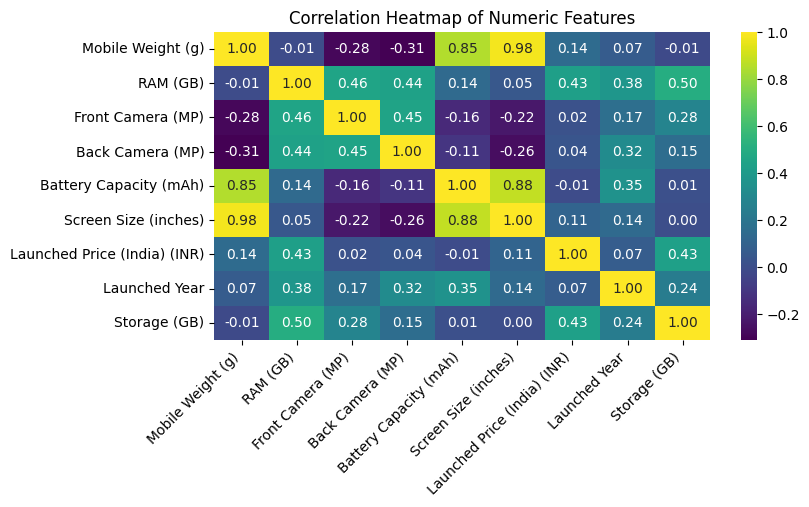

In [61]:
plt.figure(figsize=(8, 4))
sb.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.xticks(rotation=45, ha='right')
plt.show()

In [62]:
# Filtering only the correlation with Price

price_corr=df_cleaned.corr(numeric_only=True).iloc[6].drop("Launched Price (India) (INR)",axis=0).sort_values()
price_corr

Battery Capacity (mAh)   -0.007829
Front Camera (MP)         0.023723
Back Camera (MP)          0.035269
Launched Year             0.070470
Screen Size (inches)      0.108599
Mobile Weight (g)         0.141899
RAM (GB)                  0.425273
Storage (GB)              0.432659
Name: Launched Price (India) (INR), dtype: float64

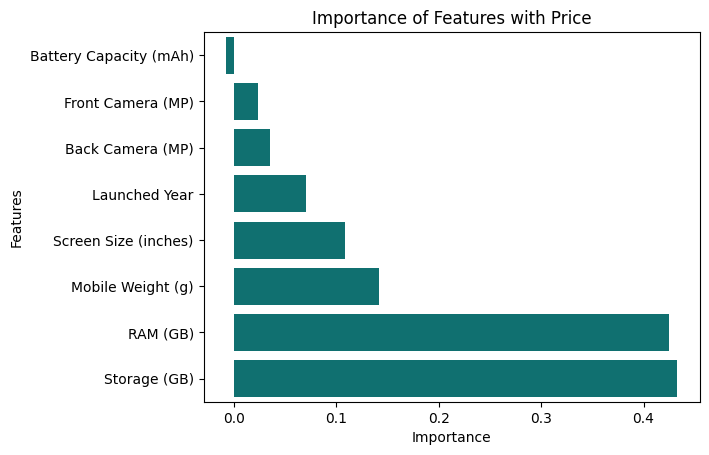

In [63]:
sb.barplot(y=price_corr.index,x=price_corr, color="teal")
plt.ylabel("Features")
plt.xlabel("Importance")
plt.title("Importance of Features with Price")
plt.show()

In [64]:
# We can see that Storage plays the most important factor in deciding the price followed by RAM and Mobile Weight

In [65]:
# We can see Battery capacity, Screen size and Mobile Weight have high corelation with each other
# Lets do a scatter plot of them

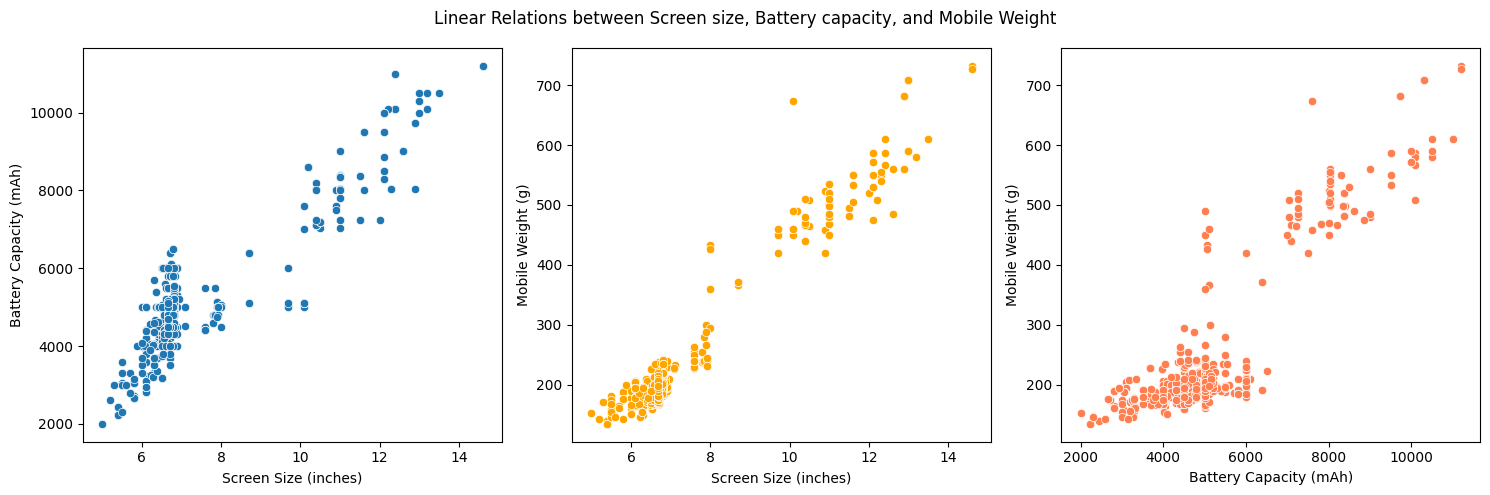

In [66]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Linear Relations between Screen size, Battery capacity, and Mobile Weight')
sb.scatterplot(df5,y="Battery Capacity (mAh)",x="Screen Size (inches)", ax=axes[0])
sb.scatterplot(df5,y="Mobile Weight (g)",x="Screen Size (inches)", color="orange", ax=axes[1])
sb.scatterplot(df5,y="Mobile Weight (g)",x="Battery Capacity (mAh)", color="coral", ax=axes[2])
plt.tight_layout()
plt.show()

In [67]:
# We can see that all three are linearly reated. That is, if a screen size or battery increases it increases the weight of the mobile.

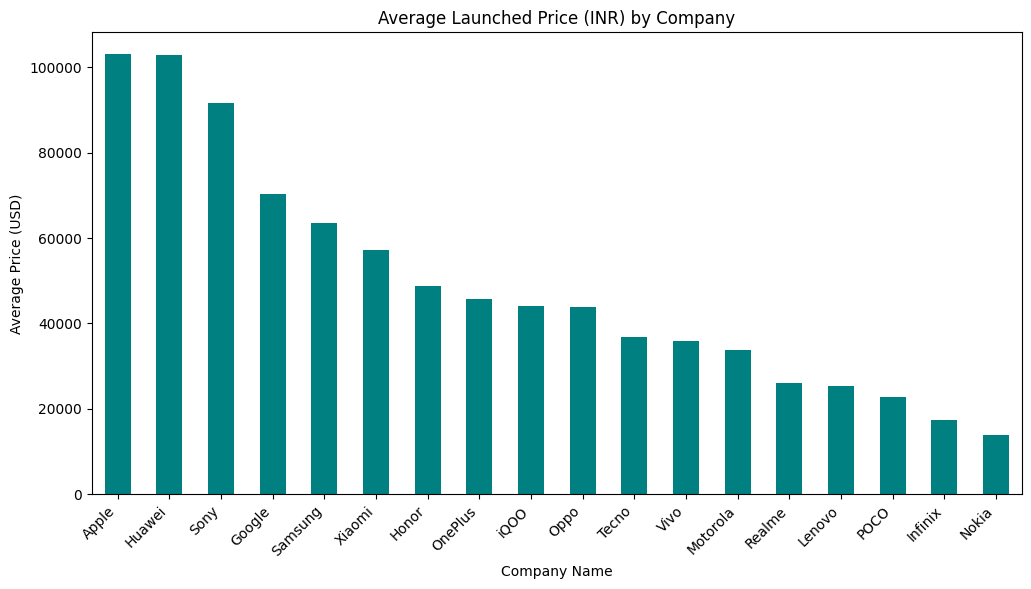

In [68]:
# Lets find the average price of each phone company

avg_price_by_company = df_cleaned.groupby('Company Name')['Launched Price (India) (INR)'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_price_by_company.plot(kind='bar', color="teal")
plt.title('Average Launched Price (INR) by Company')
plt.xlabel('Company Name')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [69]:
# we can make a generalization that Apple and Huawei have the costliest phones.

In [70]:
# Lets look at the trend according to the year
group_by_year=df_cleaned.groupby('Launched Year').mean(numeric_only=True).sort_values('Launched Year')
group_by_year.round(2)

,Mobile Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Battery Capacity (mAh),Screen Size (inches),Launched Price (India) (INR),Storage (GB)
Launched Year,,,,,,,,
2014,149.50,1.50,5.00,13.00,2150.00,5.25,13999.00,16.00
2016,270.00,3.40,7.20,11.00,3920.00,6.96,17095.40,32.00
2017,169.22,4.44,14.56,14.89,3220.78,5.69,40752.78,103.11
2018,180.29,4.38,10.71,13.71,3177.95,6.16,56640.62,148.57
2019,191.46,6.28,18.93,28.52,3950.72,6.39,50288.39,179.48
2020,256.36,6.42,15.47,35.18,4958.59,7.37,50209.62,166.65
2021,204.83,7.06,17.59,46.71,4616.30,6.75,42235.81,164.40
2022,228.11,7.58,16.97,44.00,4992.62,7.05,48878.03,178.90
2023,238.97,8.16,17.94,52.17,5297.85,7.27,51804.82,194.43


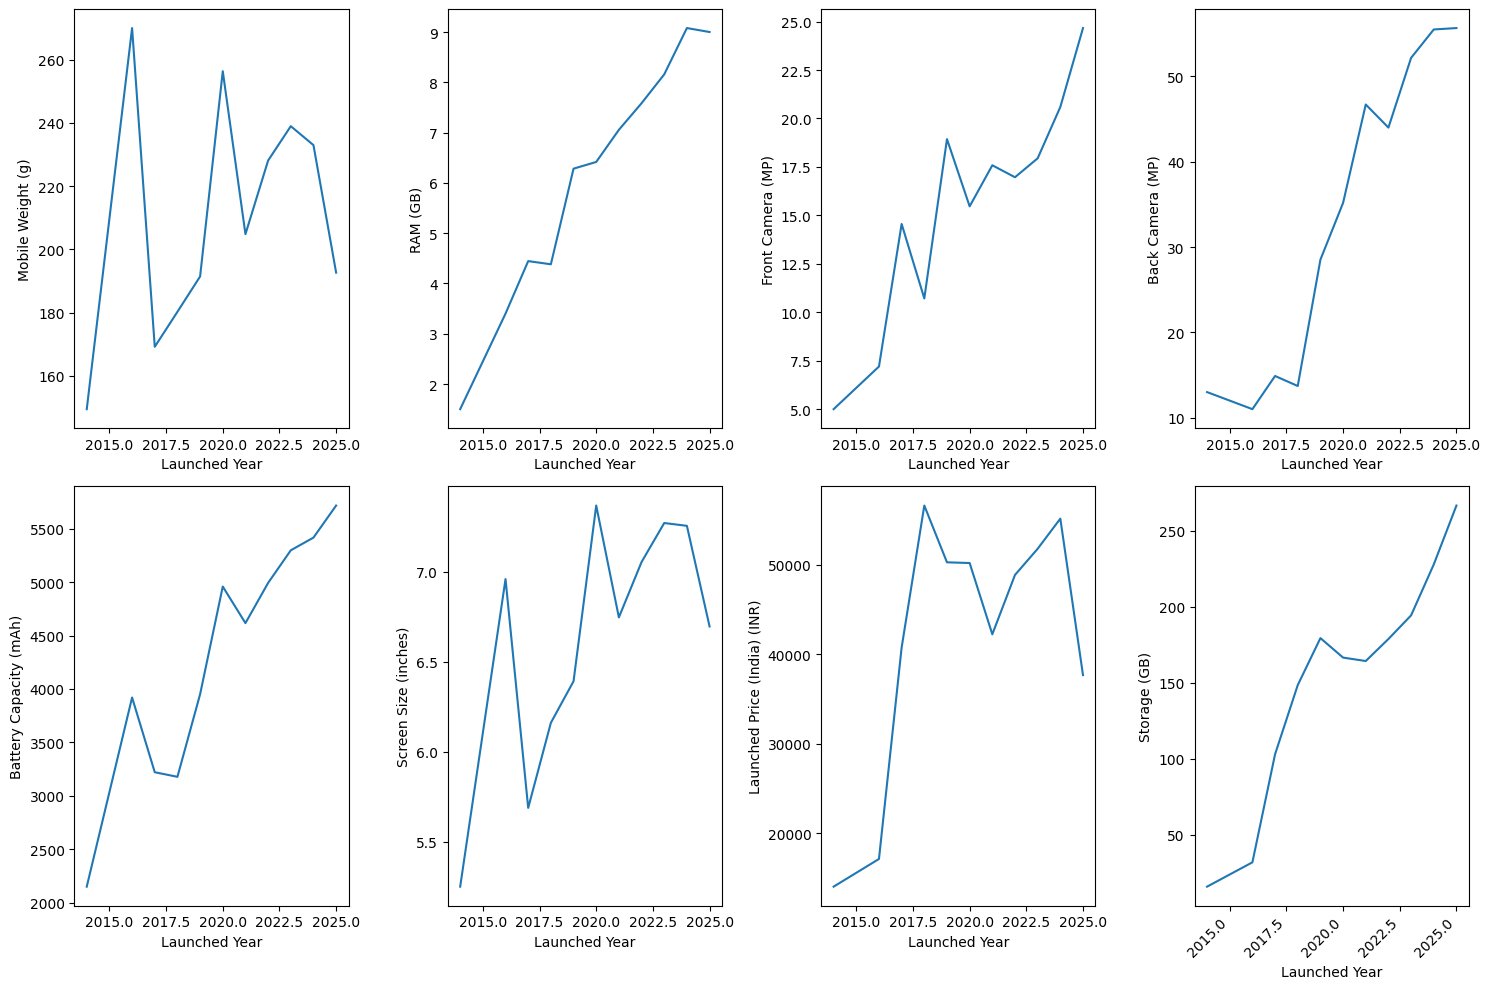

In [71]:
position=[[0,0],[0,1],[0,2],[0,3],[1,0],[1,1],[1,2],[1,3]]
j=0
fig,axes=plt.subplots(2,4,figsize=(15,10))
for i in group_by_year.columns:
    sb.lineplot(data=group_by_year, x= "Launched Year", y= i, ax=axes[position[j][0],position[j][1]])
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    j=j+1

In [72]:
# We can see that for newly launched phones all featues except mobile weight, price and screen size were increasing.